In [3]:
from random import *
import numpy as np
import matplotlib.pyplot as plt

# Introduction

We want to find out numerically the distribution of the queue-length ratio in the context of a model
of preferential attachment. Here we consider two restaurants only and a large number of customers (agents) who come to
these restaurants. Each day the same number of agents sequentially arrives and decides which restaurant to enter.
But as agents alter their strategies different kind of dynamics of the model is seen. 

In order to find the ratio of the distribution of the queue length, we consider the fixed points, which indicate the final repartition of the restaurant after many iterations. 

It is seen from numerical results that the existence of a distribution of the fixed points is quite robust and it is also seen that in some cases the variations in the ratio of the queue-lengths follow a power-law.


# Polya's model

First, we try to figure out how fixed points are distributed for Polya's model.
We want to show that the distribution is uniform beetween 0 and 1 and thus, there is an infinity of fixed points.

Initially there are two restaurants, occupied by one agent each. At every time-step one agent arrives and decides which restaurant to enter. Suppose there are $N_{A}$ number of customers in restaurant A and $N_{B}$ number of customers in restaurant B. We assume that the probability that the next agent assigns to restaurant A is $\frac{N_{A}}{(N_{A}+N_{B}}$ and the rest is assigned to restaurant B



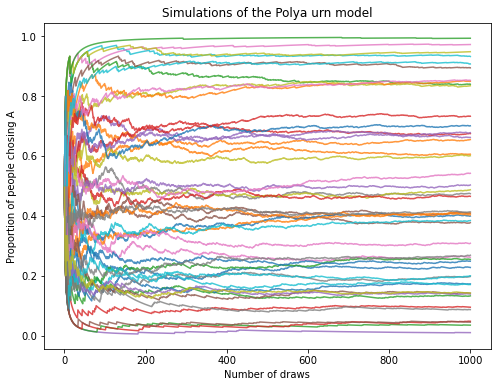

In [4]:
#In every function we put alpha as a paramter but sometimes it is not used. We use it to factorize the code 
# (It will be usefull when we plot the density)

def polya(N,alpha=None): 
    """Simulates the Polya urn model (applied to restaurant) and returns the proportion of person chosing
    restaurant A"""
    pA=1/2
    nA=1
    nB=1
    pA_list=[pA]
    for i in range(N):
        x=np.random.binomial(1, pA) # Simulate a draw from the urn
        if x==1:
            nA=nA+1
        else:
            nB=nB+1
        pA=nA/(nA+nB)
        pA_list.append(pA)
    return pA_list

# Set the parameters of the model and the number of simulations to run
N = 1000
nA = 1
nB = 1
num_simulations = 50

# Generate the plots
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(num_simulations):
    x=np.arange(N+1)
    y=polya(N)
    ax.plot(x,y, alpha=0.8, linewidth=1.5)
ax.set_xlabel('Number of draws')
ax.set_ylabel('Proportion of people chosing A')
ax.set_title('Simulations of the Polya urn model')
plt.show()


We see that the dsitribution of fixed points seems to be uniformely distributed.

# Agents avoid crowd

The second model ploted is the one where people want to avoid the crowd. The probability of an agent to choose 
restaurant A is $\frac{N_{B}}{N_{A}+N_{B}}$. Like this, if the restaurant A has too many people in the crowd, restaurant B 
will be more attractive for the next customer.

Logically, the fixed points are supposed to tend to $1/2$.

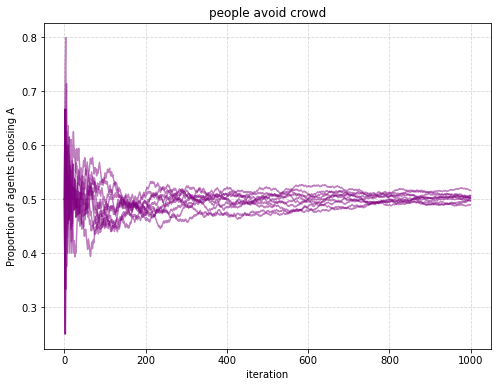

In [5]:

def avoid_crowd(N,alpha=None):
    Qa=[1]
    Qb=[1]
    probaA=[1/2]
    probaA_list=[probaA]
    for i in range (1,N):
        if np.random.random()<=len(Qa)/(len(Qa)+len(Qb)):
            Qb+=[1]
        else:
            Qa+=[1]
        probaA+=[len(Qa)/(len(Qa)+len(Qb))]
    return probaA

N = 1000
x = np.arange(N)

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(10):
    y = avoid_crowd(N)
    ax.plot(x, y, alpha=0.5, color='purple')
    
ax.set_title('people avoid crowd')
ax.set_xlabel('iteration')
ax.set_ylabel('Proportion of agents choosing A')
ax.grid(True, linestyle='--', alpha=0.5)

plt.show()



# Agents choose randomly

At each iteration, the agent follow a Bernoulli Law. He can chose the restaurant A with a probability of 1/2 or chose restaurant B with the same probabilty.

Thus we expect the fixed points to converge to $1/2$.

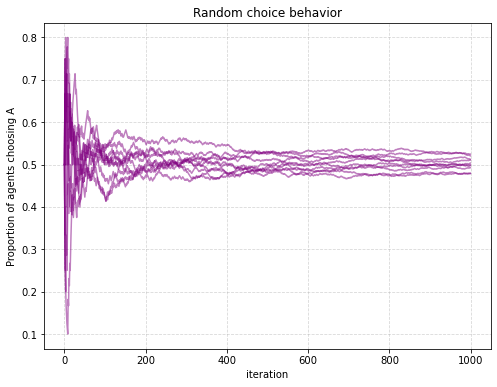

In [6]:

def randomly_choose(N,alpha=None):
    Qa = [1]
    Qb = [1]
    probaA = [1/2]
    
    for i in range(1, N):
        if np.random.random() <= 0.5:
            Qb += [1]
        else:
            Qa += [1]
        probaA += [len(Qa) / (len(Qa) + len(Qb))]
        
    return probaA

N = 1000
x = np.arange(N)

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(10):
    y = randomly_choose(N)
    ax.plot(x, y, alpha=0.5, color='purple')
    
ax.set_title('Random choice behavior')
ax.set_xlabel('iteration')
ax.set_ylabel('Proportion of agents choosing A')
ax.grid(True, linestyle='--', alpha=0.5)

plt.show()



# Agents follow the crowd only

This time, the probability of a person to chose restaurant A depends on an $\epsilon$ factor.

$$P_{A}=\frac{P_{A}^{\epsilon}}{P_{A}^{\epsilon} + P_{B}^{\epsilon}}$$

There are 3 separated cases :

- For ($\epsilon < 1$) : This leads to a situation where all restaurants share the agents equally. The fixed               point is uniquely determined at $P_A = 0.5$.
- For ($\epsilon = 1$) : This is the Pólya model. It is a well-known result that there exists an infinite number of   fixed points $P_A$ for this game distributed uniformly over $[0, 1]$.
- For ($\epsilon > 1$) : One restaurant gradually absorbs the total population. Which restaurant will eventually     get all agents will depend upon the choice of the first few agents.


 


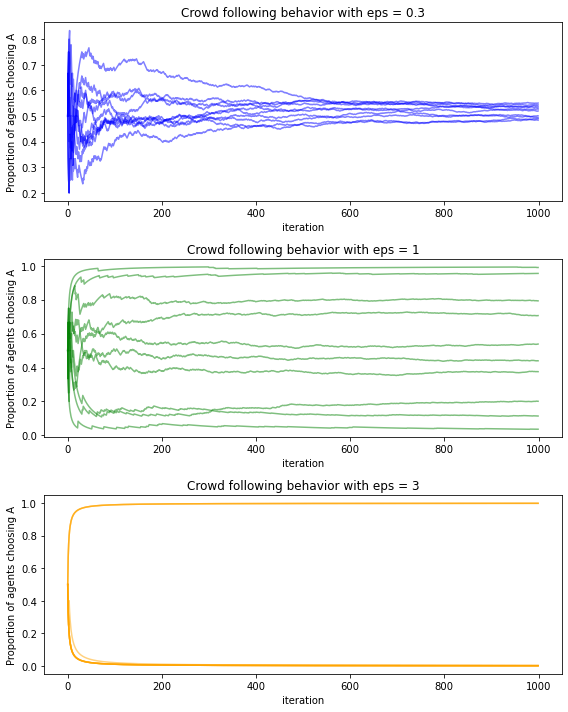

In [7]:

def follow_crowd(N, eps):
    Qa = [1]
    Qb = [1]
    probaA = [1/2]
    
    for i in range(1, N):
        if np.random.random() <= (len(Qa)**eps) / (len(Qa)**eps + len(Qb)**eps):
            Qa += [1]
        else:
            Qb += [1]
        probaA += [len(Qa) / (len(Qa) + len(Qb))]
        
    return probaA

N = 1000
x = np.arange(N)

fig, ax = plt.subplots(3, 1, figsize=(8, 10))

for i in range(10):
    y = follow_crowd(N, 0.3)
    ax[0].plot(x, y, alpha=0.5, color='blue')
ax[0].set_title('Crowd following behavior with eps = 0.3')
ax[0].set_xlabel('iteration')
ax[0].set_ylabel('Proportion of agents choosing A')


for i in range(10):
    y = follow_crowd(N, 1)
    ax[1].plot(x, y, alpha=0.5, color='green')
ax[1].set_title('Crowd following behavior with eps = 1')
ax[1].set_xlabel('iteration')
ax[1].set_ylabel('Proportion of agents choosing A')


for i in range(10):
    y = follow_crowd(N, 3)
    ax[2].plot(x, y, alpha=0.5, color='orange')
ax[2].set_title('Crowd following behavior with eps = 3')
ax[2].set_xlabel('iteration')
ax[2].set_ylabel('Proportion of agents choosing A')


plt.tight_layout()
plt.show()


# existence of a general preference

We suppose that it exists a general preference for restaurant A (it might be the restaurant's reputation for example). The general preference is represented by $\alpha$ with $0\leq\alpha \leq 1$. The preference is independant from the previous agents (it does not vary in time).

Hence the probabilities that an agent assigns to restaurant A and B are 
$$ P_{A}=\frac{P_{A}+\alpha}{P_{A}+P_{B}} \quad and \quad P_{B}=\frac{P_{B}-\alpha}{P_{A}+P_{B}}$$

There are 3 cases :

- if $\alpha=0$ it is Polya's Model
- if $0<\alpha<1$ restaurant A will attract more customers 
- if $\alpha=1$ restaurant A will attract **all** the customers

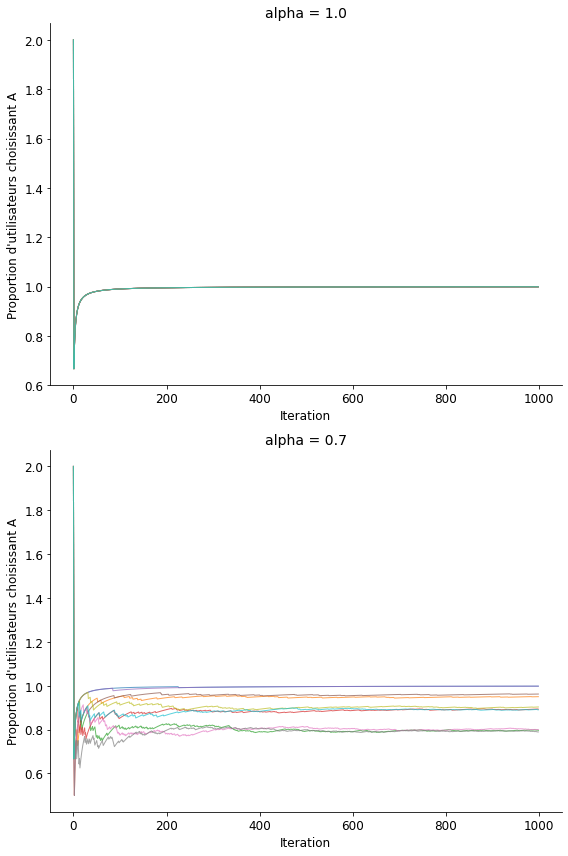

In [8]:
def general_pref(N,alpha):
    Qa=[1]
    Qb=[1]
    probaA=[len(Qa)/len(Qa)+len(Qb)]
    for i in range (1,N):
        if np.random.random()<=(len(Qa)+alpha)/(len(Qa)+len(Qb)):
            Qa+=[1]
        else:
            Qb+=[1]
        probaA+=[len(Qa)/(len(Qa)+len(Qb))]
    return probaA

N = 1000  # nombre d'itérations
x = range(N)

# Tracer les graphiques
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 12))

for i in range(10):
    y = general_pref(N, 1)
    axes[0].plot(x, y, linewidth=1, alpha=0.7)

for i in range(10):
    y = general_pref(N, 0.7)
    axes[1].plot(x, y, linewidth=1, alpha=0.7)

# Personnaliser les graphiques
for ax in axes:
    ax.set_xlabel("Iteration", fontsize=12)
    ax.set_ylabel("Proportion d'utilisateurs choisissant A", fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

axes[0].set_title("alpha = 1.0", fontsize=14)
axes[1].set_title("alpha = 0.7", fontsize=14)

plt.tight_layout()
plt.show()

# arbitrary preferences

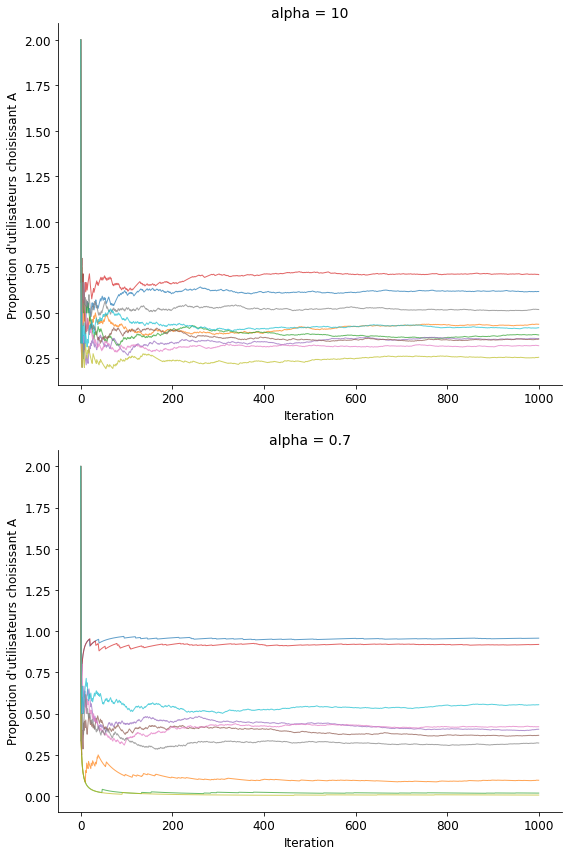

In [9]:
def arbitrary_pref(N,alpha):
    Qa=[1]
    Qb=[1]
    probaA=[len(Qa)/len(Qa)+len(Qb)]
    for i in range (1,N):
        if np.random.random()<= 0.5:
            if np.random.random()<=(len(Qa)+alpha)/(len(Qa)+len(Qb)):
                Qa+=[1]
            else:
                Qb+=[1]
        else:
            if np.random.random()<=(len(Qa)-alpha)/(len(Qa)+len(Qb)):
                Qa+=[1]
            else:
                Qb+=[1]
        probaA+=[len(Qa)/(len(Qa)+len(Qb))]
    return probaA

N = 1000  # nombre d'itérations
x = range(N)

# Tracer les graphiques
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 12))

for i in range(10):
    y = arbitrary_pref(N, 10)
    axes[0].plot(x, y, linewidth=1, alpha=0.7)

for i in range(10):
    y = arbitrary_pref(N, 0.7)
    axes[1].plot(x, y, linewidth=1, alpha=0.7)

# Personnaliser les graphiques
for ax in axes:
    ax.set_xlabel("Iteration", fontsize=12)
    ax.set_ylabel("Proportion d'utilisateurs choisissant A", fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

axes[0].set_title("alpha = 10", fontsize=14)
axes[1].set_title("alpha = 0.7", fontsize=14)

plt.tight_layout()
plt.show()

# Fixed points density


The code below calculates the density of fixed points for a given mathematical model at a particular value of the model parameter, alpha.

The function takes in three arguments: the model, which is a mathematical function that maps inputs to outputs, the value of alpha, and the number of fixed points, n, to generate.

The function first generates n fixed points for the model by repeatedly calling the model function and appending the last value in the output to a list of fixed points.

The function then partitions the interval [0,1] into 100 equally spaced parts and calculates the density of fixed points in each subinterval. For each subinterval, the function loops through the list of fixed points and counts the number of fixed points that fall within the subinterval. The count is then divided by n multiplied by the width of each subinterval (0.01 in this case) to get the density of fixed points in that subinterval. The densities for all subintervals are then returned as a list.


In [13]:
def FixedPoints_density(model,n,alpha=None): #alpha is a model parameter
    """we start by generating many fixed points for the model """
    FixedPointsList=[]
    for i in range(n):
        fp=model(N,alpha)[-1]
        FixedPointsList.append(fp)
    """ we cut [0,1] in 100 parts"""
    t=np.arange(0,1,0.01)
    density=[]
    for i in range(100):
        proba_fp=0
        for j in FixedPointsList:
            if j>=i/100 and j<(i+1)/100:
                proba_fp=proba_fp+1
        density.append(proba_fp/(n*0.01))
    return density

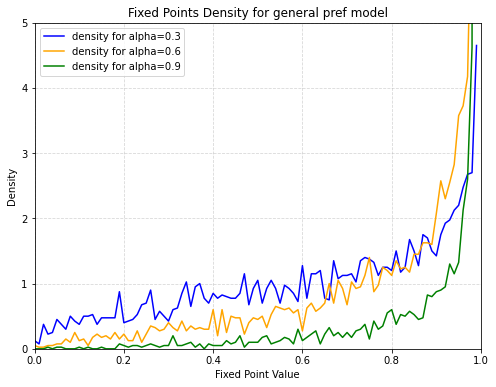

In [14]:
"""This cell is long to run """



# Generate data
t = np.arange(0, 1, 0.01)
alpha_values = [0.3, 0.6, 0.9]
colors = ['blue', 'orange', 'green']
labels = [f'density for alpha={alpha}' for alpha in alpha_values]
densities = [FixedPoints_density(general_pref, 4000,alpha) for alpha in alpha_values]

# Create figure and axes objects
fig, ax = plt.subplots(figsize=(8, 6))

# Plot each density with a different color and label
for i, density in enumerate(densities):
    ax.plot(t, density, color=colors[i], label=labels[i])

# Set plot title and axis labels
ax.set_title('Fixed Points Density for general pref model')
ax.set_xlabel('Fixed Point Value')
ax.set_ylabel('Density')

# Set plot limits
ax.set_xlim([0, 1])
ax.set_ylim([0, 5])

# Add legend
ax.legend(loc='upper left')

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.show()



# Density of fixed points for an arbitrary preferences model

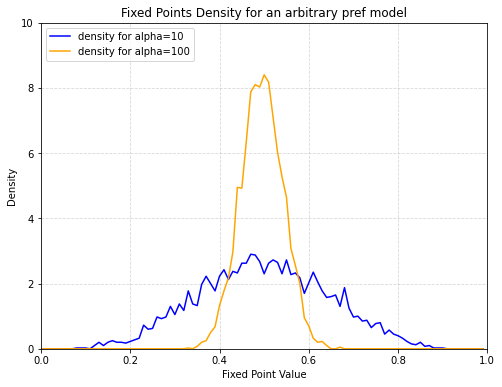

In [17]:
# Generate data
t = np.arange(0, 1, 0.01)
alpha_values = [10, 100]
colors = ['blue', 'orange', 'green']
labels = [f'density for alpha={alpha}' for alpha in alpha_values]
densities = [FixedPoints_density(arbitrary_pref,  4000,alpha) for alpha in alpha_values]

# Create figure and axes objects
fig, ax = plt.subplots(figsize=(8, 6))

# Plot each density with a different color and label
for i, density in enumerate(densities):
    ax.plot(t, density, color=colors[i], label=labels[i])

# Set plot title and axis labels
ax.set_title('Fixed Points Density for an arbitrary pref model')
ax.set_xlabel('Fixed Point Value')
ax.set_ylabel('Density')

# Set plot limits
ax.set_xlim([0, 1])
ax.set_ylim([0, 10])

# Add legend
ax.legend(loc='upper left')

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.show()


# Dependence on history 

Here we consider the case where agents not only see the current pattern of the
crowd but also give weightage to the restaurants which were more attractive in the previous days.


Imagine that we observe the queue lenght repartition for m days. We call $H_1$ the m-th fixed point.
So history for restaurant A is $H_A = \frac{\delta.H_1 + \delta^2.H_2 + \ldots + \delta^m.H_m}{Z}$ où  $Z = \delta + \delta^2 + \ldots + \delta^m $ et $0 \leq \delta \leq \infty.$

Now, $P_A = \gamma.N_A + (1-\gamma).H_A$




Be careful, the cell below takes time to run.

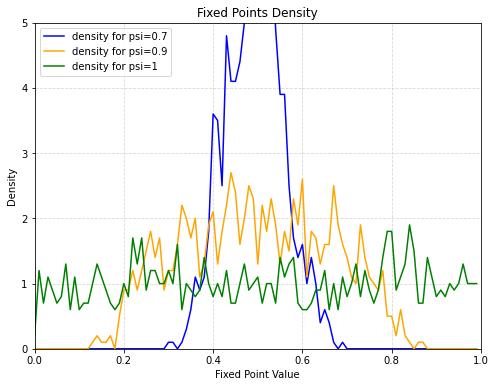

In [142]:
# Set the parameters of the model and the number of simulations to run
N = 1000
m=50
nA = 1
nB = 1
psi=0.5
delta=1


def history(m, model,alpha,delta):
    FixedPointsList=[]
    N=1000
    H=0
    h=0
    for i in range (m):
        fp=model(N,alpha)[-1]
        FixedPointsList.append(fp)
    for i in range (1,m+1):
        H=H+ ((delta**i) * FixedPointsList[-i])
        h=h+delta**i
    H=H/h
    return H

def model_with_history(psi,model,alpha,m,delta):
    if psi <0 and psi >1:
        return False
    else:
        H=history(m, model,alpha,delta)
        x=0
        nA = 1
        nB = 1
        pA=psi*(nA/(nA+nB)) + (1-psi)*H
        proba_a=[pA]
        for i in range(N):
            if pA<=1 and pA>=0:
                x=np.random.random() # Simulate a draw from the urn
                if x<= psi*(nA/(nA+nB)) + (1-psi)*H:
                    nA=nA+1
                else:
                    nB=nB+1
            pA=psi*(nA/(nA+nB)) + (1-psi)*H
            proba_a+=[pA]
        return proba_a

    
    
def FixedPointshistory_density(n,psi): #alpha is a model parameter
    """we start by generating many fixed points for the model """
    FixedPointsList=[]
    for i in range(n):
        fp=model_with_history(psi,general_pref,0,m,delta)[-1]
        FixedPointsList.append(fp)
    """ we cut [0,1] in 100 parts"""
    t=np.arange(0,1,0.01)
    density=[]
    for i in range(100):
        proba_fp=0
        for j in FixedPointsList:
            if j>=i/100 and j<(i+1)/100:
                proba_fp=proba_fp+1
        density.append(proba_fp/(n*0.01))
    return density



# Generate data
t = np.arange(0, 1, 0.01)
psi_values = [0.7, 0.9,1]
colors = ['blue', 'orange', 'green']
labels = [f'density for psi={psi}' for psi in psi_values]
densities = [FixedPointshistory_density(1000,psi) for psi in psi_values]

# Create figure and axes objects
fig, ax = plt.subplots(figsize=(8, 6))

# Plot each density with a different color and label
for i, density in enumerate(densities):
    ax.plot(t, density, color=colors[i], label=labels[i])

# Set plot title and axis labels
ax.set_title('Fixed Points Density')
ax.set_xlabel('Fixed Point Value')
ax.set_ylabel('Density')

# Set plot limits
ax.set_xlim([0, 1])
ax.set_ylim([0, 5])

# Add legend
ax.legend(loc='upper left')

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.show()



In this case, it kind of look like the fig.3 of the article but our computers are not powerfull enough to make the same simulation that in the article.

The important thing to keep it mind even if it is not perfect is that it looks like a Gaussian density centered in 0.5.

And for psi=1 it looks like a uniform distribution (because it is a polya model which make sense)

# VARIATION IN THE RATIO OF THE QUEUE-LENGTHS


In this part, we consider the ratio of the queue lenght and the aim is to find out numerically the distribution of the queue length.

We name $Q_{Ai}$ the proportion of people chosing restaurant A at day $i$.
Thus, the queue length ratio is $L_{A}=\frac{Q_{Ai}}{Q_{Aj}}$ with $j=i+1$

We can notice that in the first part we have already calculated $Q_{Ai}$ which is the fixed point.

In [143]:
def queue_length_ratio(n,N,model,alpha=None):
    """we start by generating many fixed points for the model 
        n is the number of day and N is the number of customer each day
    """
    FixedPointsList=[]
    QueueLenghtList=[]
    for i in range(n):
        fp=model(N,alpha)
        FixedPointsList.append(fp[-1]) #we take the last value of the list generated
        
    for i in range(n-1):
        QueueLenghtList.append(FixedPointsList[i]/FixedPointsList[i+1])
        
    return QueueLenghtList



In [144]:
#We plot the density of the queue_length ratios

def queue_length_density(n,N,model,alpha=None):
    """n is the number of day and N is the number of customer each day """
    QueueLenghtList=queue_length_ratio(n,N,model,alpha)
    
    #we apply the same method that we used to find out the density of the fixed points
    t=np.arange(0,10,0.5)
    density=[]
    for i in range(20):
        proba_fp=0
        for j in range(len(QueueLenghtList)):
            if QueueLenghtList[j]>=i*0.5 and QueueLenghtList[j]<(i+1)*0.5:
                proba_fp=proba_fp+1
        density.append(proba_fp/(n*0.5))
    return t,density

# Queue lenght density for a general preference model and different values of alpha

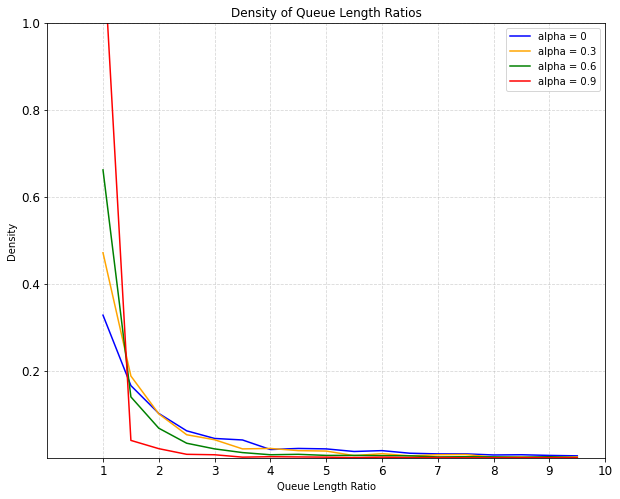

In [145]:
# We define a color palette to use for the different values of alpha
colors = ['blue', 'orange', 'green', 'red']
alpha_list=[0,0.3,0.6,0.9]
# We create a figure and axis object to allow us to modify the plot
fig, ax = plt.subplots(figsize=(10, 8))

# We set the x and y axis limits
ax.set_xlim(0,10)
ax.set_ylim(0,0.5)


# We iterate over the different values of alpha and plot the density for each one
for i, alpha in enumerate(alpha_list):
    
    t,QueueLenghtList=queue_length_density(4000,1000,general_pref,alpha)
    t= [ i  for i in t if i>=0.95]
    QueueLenghtList=QueueLenghtList[len(QueueLenghtList)-len(t):]
    # Plotting only elements starting from 1
    ax.plot(t,QueueLenghtList, color=colors[i], label=f'alpha = {alpha}')

# We set the axis labels and title
ax.set_xlabel('Queue Length Ratio')
ax.set_ylabel('Density')
ax.set_title('Density of Queue Length Ratios')

# We set the legend to show the values of alpha for each line
ax.legend()

# We add a grid to the plot
ax.grid(True, linestyle='--', alpha=0.5)

# We adjust the tick marks and labels on the x and y axes
ax.set_xticks(range(1, 11))
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.tick_params(axis='both', which='major', labelsize=12)





We can notice that this graph coincides with Figure 4 of the article. 

It is also interesting to notice that it looks like a power law which has for equation
$$y=ax^k$$


# Density of Queue lenght ratio for arbitrary pref model

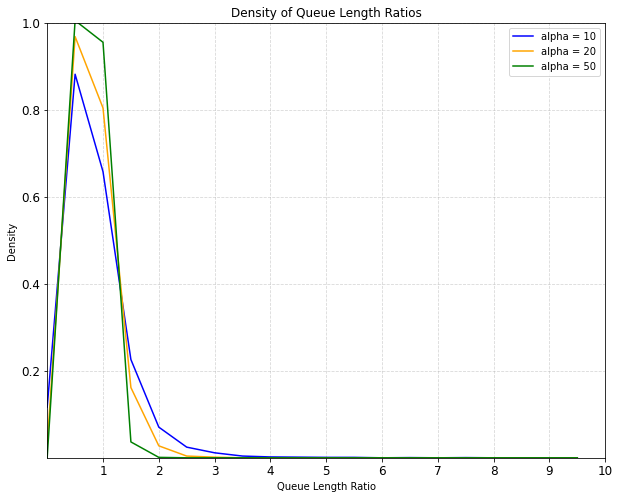

In [146]:
# We define a color palette to use for the different values of alpha
colors = ['blue', 'orange', 'green', 'red']
alpha_list=[10,20,50]
# We create a figure and axis object to allow us to modify the plot
fig, ax = plt.subplots(figsize=(10, 8))

# We set the x and y axis limits
ax.set_xlim(0,10)
ax.set_ylim(0,0.5)


# We iterate over the different values of alpha and plot the density for each one
for i, alpha in enumerate(alpha_list):
    t,QueueLenghtList=queue_length_density(4000,1000,arbitrary_pref,alpha)
    ax.plot(t,QueueLenghtList, color=colors[i], label=f'alpha = {alpha}')

# We set the axis labels and title
ax.set_xlabel('Queue Length Ratio')
ax.set_ylabel('Density')
ax.set_title('Density of Queue Length Ratios')

# We set the legend to show the values of alpha for each line
ax.legend()

# We add a grid to the plot
ax.grid(True, linestyle='--', alpha=0.5)

# We adjust the tick marks and labels on the x and y axes
ax.set_xticks(range(1, 11))
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.tick_params(axis='both', which='major', labelsize=12)

# Alternative modelisation 

Finally, we see that the article implements models that assume that all agents follow the same pattern. But we can assume that in reality, each agent has a different preferential attachment between the six exposed before. 
We want to implement a function which assign to each agent randomly a personnal preference between those exposed before, in the case where the other days doesn't matter. 
We want to observe if there are any fixed points in that case. 

In [156]:
def individualism(n,alpha=None):
    Qa=[1]
    Qb=[1]
    ProbaA=[]
    #different parameters for the different models
    eps=0.7
    alpha=0.4
    psi=0.3
    for i in range (n):
        choice=np.random.uniform(1, 6, 1)
        if choice < 2: #arbitrary
            if np.random.random() <= 0.5:
                Qb += [1]
            else:
                Qa += [1]
        if choice >= 2 and choice <3: #avoid crowd
            if np.random.random()<=len(Qa)/(len(Qa)+len(Qb)):
                Qb+=[1]
            else:
                Qa+=[1]
        if choice >= 3 and choice <4: #follow crowd
            if np.random.random() <= (len(Qa)**eps) / (len(Qa)**eps + len(Qb)**eps):
                Qa += [1]
            else:
                Qb += [1]
        if choice >= 4 and choice <5: #general pref
            if np.random.random()<=(len(Qa)+alpha)/(len(Qa)+len(Qb)):
                Qa+=[1]
            else:
                Qb+=[1]
        else: #arbitrary pref
            if np.random.random()<= 0.5:
                if np.random.random()<=(len(Qa)+alpha)/(len(Qa)+len(Qb)):
                    Qa+=[1]
                else:
                    Qb+=[1]
            else:
                if np.random.random()<=(len(Qa)-alpha)/(len(Qa)+len(Qb)):
                    Qa+=[1]
                else:
                    Qb+=[1]
        ProbaA += [len(Qa) / (len(Qa) + len(Qb))]
    return ProbaA
    

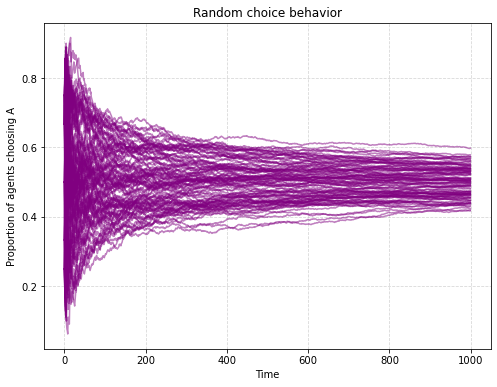

In [150]:
N = 1000
x = np.arange(N)

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(100):
    y = individualism(N)
    ax.plot(x, y, alpha=0.5, color='purple')
    
ax.set_title('Random choice behavior')
ax.set_xlabel('Time')
ax.set_ylabel('Proportion of agents choosing A')
ax.grid(True, linestyle='--', alpha=0.5)

plt.show()


# density for individualism preferences

Finally we plot the density of the individualism model and it looks like it follows a gaussian model even if
our choices of model for each agent are random

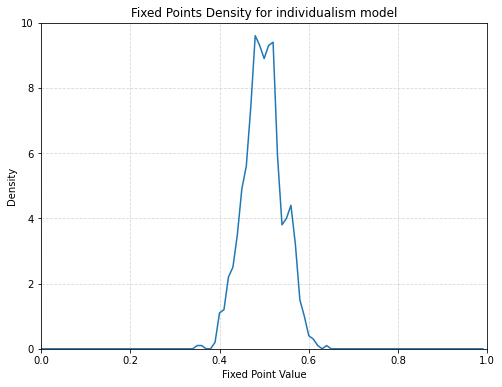

In [160]:
t = np.arange(0, 1, 0.01)
density=FixedPoints_density(individualism,1000,alpha=None)
# Create figure and axes objects
fig, ax = plt.subplots(figsize=(8, 6))

# Plot each density with a different color and label
ax.plot(t, density)

# Set plot title and axis labels
ax.set_title('Fixed Points Density for individualism model')
ax.set_xlabel('Fixed Point Value')
ax.set_ylabel('Density')

# Set plot limits
ax.set_xlim([0, 1])
ax.set_ylim([0, 10])


# Add gridlines
ax.grid(True, linestyle='--', alpha=0.5)

# Show plot
plt.show()
